In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load DataSet
* load the dataset using pandas
* exploration and data visualization

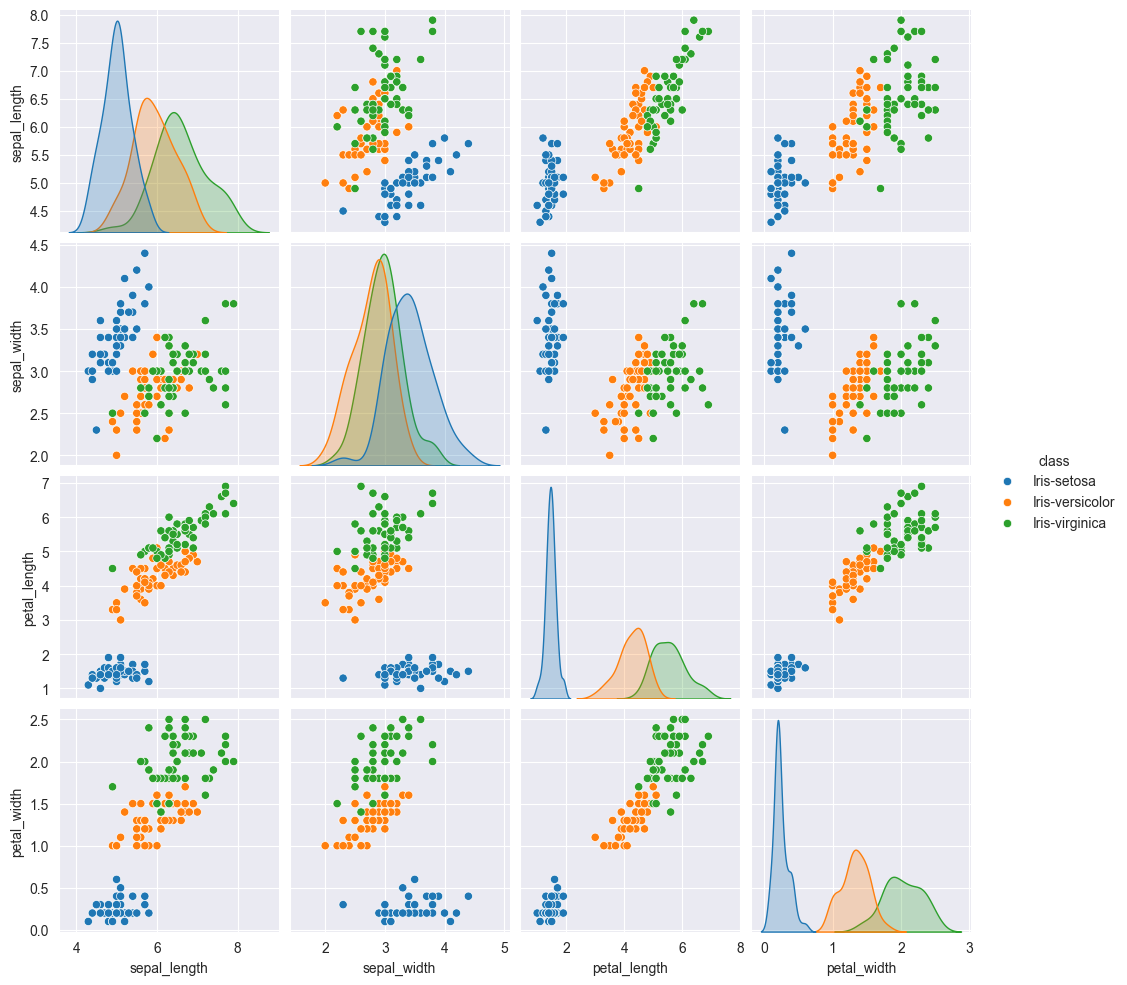

In [15]:
# Load the dataset
iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                 header=None,
                 names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
# Pairplot
sns.pairplot(iris_df, hue='class')
plt.show()

### Data preprocessing
* Splitting data to train X and label y
* Encoding
* Split train/test

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
iris_df['class'] = label_encoder.fit_transform(iris_df['class'])

# Split features and labels
X = iris_df.drop('class', axis=1)
y = iris_df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model build and train

<Figure size 640x480 with 0 Axes>

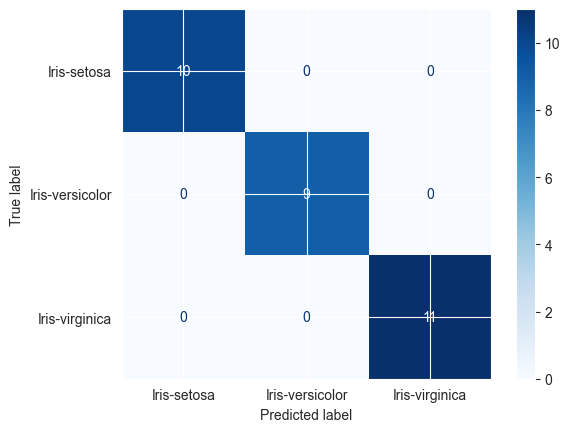

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plot Confusion Matrix
plt.figure()
disp.plot(cmap=plt.cm.Blues, values_format='d')

### Save the trained Model

In [10]:
import joblib

SAVE_PATH = 'model_dir'

# Save the model to a file
model_filename = 'iris_model.pkl'
joblib.dump(model, f'{SAVE_PATH}/{model_filename}')
print(f"💾 Model saved to {model_filename}")

# Save the label encoder to a file
label_encoder_filename = 'label_encoder.pkl'
joblib.dump(label_encoder, f'{SAVE_PATH}/{label_encoder_filename}')
print(f"💾 Label encoder saved to {label_encoder_filename}")

💾 Model saved to iris_model.pkl
💾 Label encoder saved to label_encoder.pkl
